## <center>Анализ A/B теста</center>

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

### Импорты:

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Изучим данные:

In [2]:
# неправильный путь
# hypothesis = pd.read_csv(r'D:\Code\Notebooks\Яндекс.Практикум\AB\csv\hypothesis')
# правильный путь
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Применение фреймворков для приоритезации гипотез: 

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [4]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


##### Вывод: <a id="rice"></a>
В фреймворке ICE не учитывается важный параметр - сколько пользователей затронут изменения за период (Reach). Исходя из этого, рекомендуется обратить внимание на приоритезацию гипотез из фреймворка RICE, а именно:
 - 7 гипотеза (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)
 - 2 гипотеза (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)
 - 0 гипотеза (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
 - 6 гипотеза (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)

___

## Анализ A/B теста

### Изучим данные:

In [5]:
# неправильный путь
# orders = pd.read_csv(r'D:\Code\Notebooks\Яндекс.Практикум\AB\csv\orders')
# правильный путь
orders = pd.read_csv('/datasets/orders.csv')

display(orders.head())
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [6]:
# неправильный путь
# visitors = pd.read_csv(r'D:\Code\Notebooks\Яндекс.Практикум\AB\csv\visitors')
# правильный путь
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

##### Вывод:
- Проверить данные на дубликаты
- Привести даты к формату даты

### Предобработка данных:

Проверим данные на дубликаты:

In [7]:
visitors.duplicated().sum()

0

In [8]:
orders.duplicated().sum()

0

Приведем даты к нужному формату:

In [9]:
orders['date'] = orders['date'].astype('datetime64')

In [10]:
visitors['date'] = visitors['date'].astype('datetime64')

### Стабильность кумулятивных метрик

##### Подготовим данные для построения графиков 

Создадим массив уникальных пар значений дат и групп теста:

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные:

In [12]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях:

In [13]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:

In [14]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

##### График кумулятивной выручки по дням и группам A/B-тестирования:

In [15]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


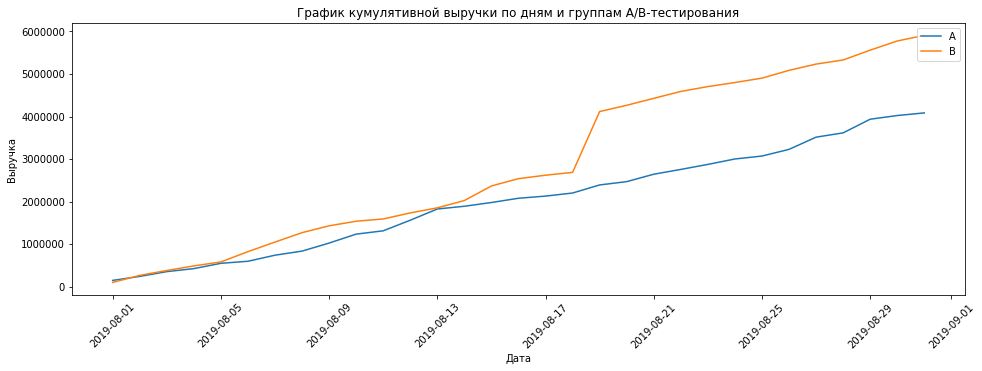

In [16]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')
#график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend(loc=1);

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

График получился очень наглядный. Но нужно его подправить: он должен содержать заголовок и подписи к осям. 
    
Проверь на соответствие этим требованиям все графики
</div>

---


Выручка увеличивается в течение всего теста, однако в в группе B наблюдается резкий скачек, это может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, проанализируем далее.

##### График среднего чека по группам:

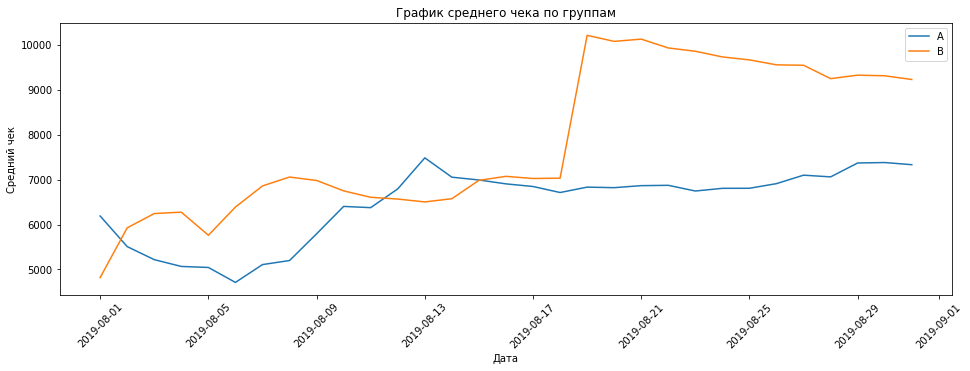

In [17]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('График среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(loc=1);

Средний чек для группы А становится равомерным и немного повышается к концу теста, тогда как в группе B наблюдается большой скачек (что также говорит об аномальных заказах) и снижение значений к концу теста.

##### График относительного изменения кумулятивного среднего чека группы B к группе A

In [18]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

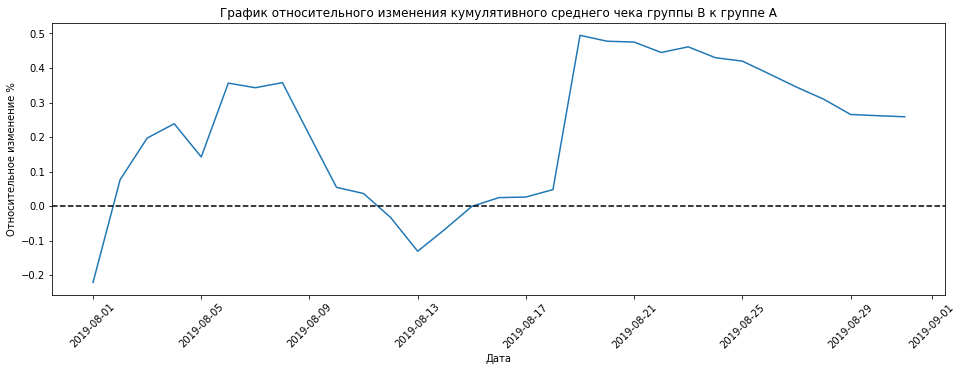

In [19]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение %')
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

##### График кумулятивной конверсии по группам:

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

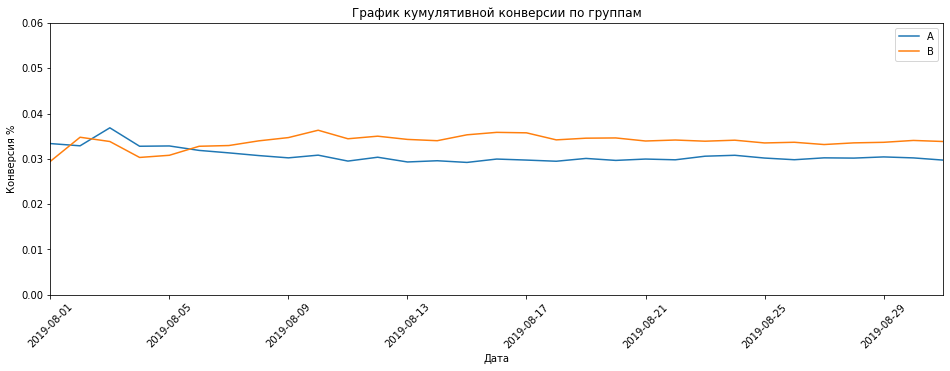

In [21]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия %')
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(loc=1)
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.060]);

В начале теста группы колебались, но постепенно сегмент группы B выровнялся и зафиксировался около одного значения, больше значения сегмента А.

##### График относительного различия кумулятивных конверсий:

In [22]:
#объеденим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

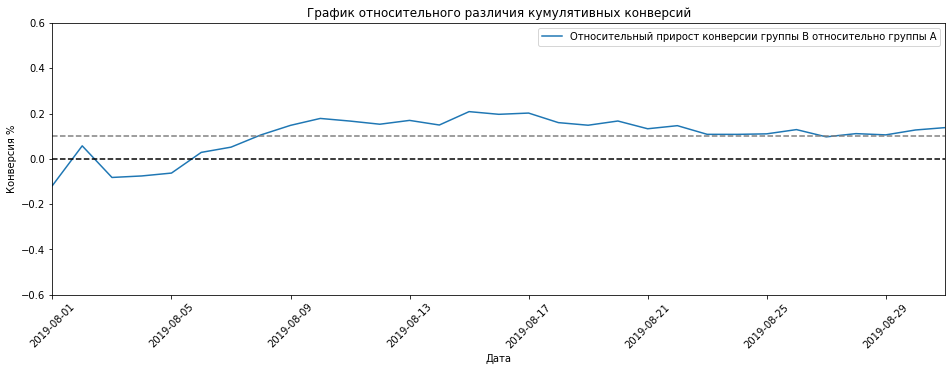

In [23]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('График относительного различия кумулятивных конверсий')
plt.xlabel('Дата')
plt.ylabel('Конверсия %')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]);

Почти с самого начала теста группа B лидирует по конверсии, зафиксировалась около прироста в 10% относительно группы A.

### Анализ выбросов и всплесков

##### Точечный график количества заказов по пользователям

In [24]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']

[2. 4.]


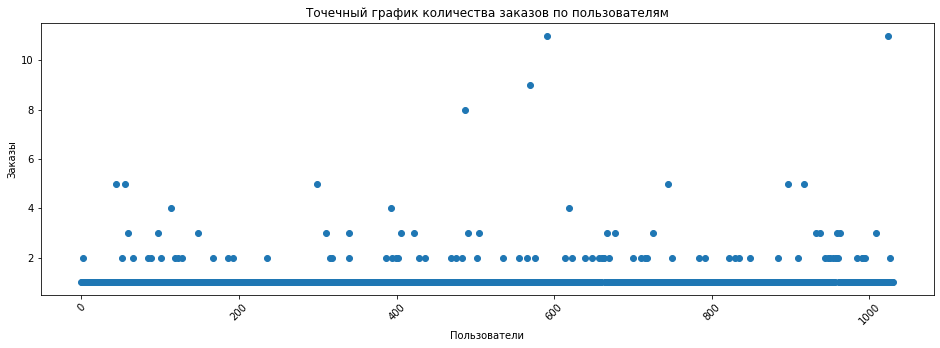

In [25]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
print(np.percentile(ordersByUsers['orders'], [95, 99]))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Не более 5% пользователей совершали больше двух заказов. И е более 1% пользователей - больше 4х заказов.

##### Точечный график стоимостей заказов

[28000.  58233.2]


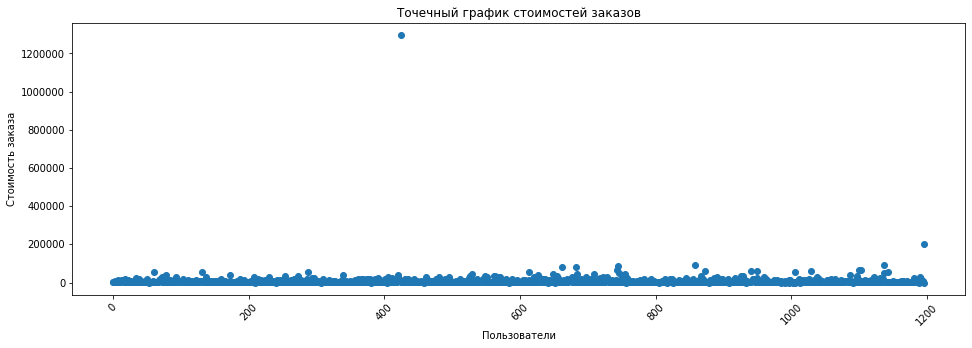

In [26]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
print(np.percentile(orders['revenue'], [95, 99]))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Не более 5% заказов дороже 280000 у.е. и не более 1% дороже 58233 у.е.

По графикам можно выбрать границу аномальных цен заказов между 20 000 и выше рублей и кол-ва заказов выше 2х. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. Таким образом, граница стоимости аномальных заказов -  выше 28000 рублей, граница кол-ва аномальных заказов - выше 2х.  

### Анализ результатов теста

In [27]:
#количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#количество заказов и суммарная выручка в выбранную дату в группе A 
ordersADaily = orders[orders['group']=='A'][['date', 'visitorId', 'transactionId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#количество заказов и суммарная выручка в выбранную дату в группе B
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#итоговая таблица
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [28]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Критический уровень статистической значимости alpha примем за 5%

In [30]:
alpha = 0.05

##### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [31]:
print('H0: Конверсия по группе А равна конверсии по группе В')
print('H1: Конверсия по группе А не равна конверсии по группе В')
print("P-value: ""{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print("Различие в конверсии между группами: ""{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

H0: Конверсия по группе А равна конверсии по группе В
H1: Конверсия по группе А не равна конверсии по группе В
P-value: 0.008
Отвергаем нулевую гипотезу

Различие в конверсии между группами: 13.8%


P-value меньше 0.05. В конверсии между группами есть статистически начимые различия. Относительный проигрыш группы А равен 13.8%

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [32]:
print('H0: Средний чек группы А равен среднему чеку группы В')
print('H1: Средний чек группы А не равен среднему чеку группы В')
print("P-value: ""{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print("Различие в среднем чеке между группами: ""{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

H0: Средний чек группы А равен среднему чеку группы В
H1: Средний чек группы А не равен среднему чеку группы В
P-value: 0.365
Не получилось отвергнуть нулевую гипотезу

Различие в среднем чеке между группами: 25.9%


P-value больше 0.05. Статистически значимых различий в среднем чеке между группами нет. Средний чек группы B выше группы A в 26%

##### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [33]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Аномальных пользователей:' ,abnormalUsers.shape)

Аномальных пользователей: (74,)


Подготовим выборки количества заказов по пользователям по группам теста:

In [34]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [35]:
print('H0: Конверсия по группе А равна конверсии по группе В')
print('H1: Конверсия по группе А не равна конверсии по группе В')
print("P-value: ""{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print("Различие в конверсии между группами: ""{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

H0: Конверсия по группе А равна конверсии по группе В
H1: Конверсия по группе А не равна конверсии по группе В
P-value: 0.007
Отвергаем нулевую гипотезу

Различие в конверсии между группами: 17.3%


P-value также меньше 0.05. В конверсии между группами есть статистически начимые различия. Относительный проигрыш группы А, по очищенным данным, равен 17.3%

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Запишем в переменные результаты стат. теста и различие в конверсии

In [36]:
abnormal_stat = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

abnormal_conv = orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A', np.logical_not(
orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1

In [37]:
print('H0: Средний чек группы А равен среднему чеку группы В')
print('H1: Средний чек группы А не равен среднему чеку группы В')
print("P-value: ""{0:.3f}".format(abnormal_stat))
if abnormal_stat < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print("Различие в среднем чеке между группами: ""{0:.1%}".format(abnormal_conv))

H0: Средний чек группы А равен среднему чеку группы В
H1: Средний чек группы А не равен среднему чеку группы В
P-value: 0.369
Не получилось отвергнуть нулевую гипотезу

Различие в среднем чеке между группами: -2.0%


P-value больше 0.05. Различий в среднем чеке между группами, по очищенным данным, нет. Средний чек группы B ниже на 2%

### Предлагается зафиксировать победу группы B по следующим причинам:
- Конверсия группы B выше группы A на 17%. Предполагается, что с увеличением конверсии будет увеличиваться средний чек.

## Общий вывод:
1. [Вывод по приоритезации гипотез](#rice)
2. Есть статистически значимое различие по конверсии между группами как по сырым, так и очищенным данным.
    - Конверсия группы B, по очищенным данным, больше группы A на 17% 
3. Статистически значимых различий в среднем чеке нет, как по сырым, так и по очищенным данным.
    - Средний чек группы B, по очищенным данным, меньше группы A на 2%
4. График различия конверсии между группами показывает, что результаты группы B лучше A: имеют тенденцию к росту, либо зафиксировались около среднего значения.